In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from functools import partial
from sklearn.feature_selection import SelectKBest,f_classif, mutual_info_classif
from sklearn.feature_selection import chi2


In [2]:
gb_bs = pd.read_excel("Balance Sheet.xls","General Business")
bank_bs = pd.read_excel("Balance Sheet.xls","Bank")
ins_bs = pd.read_excel("Balance Sheet.xls","Insurance")
sec_bs = pd.read_excel("Balance Sheet.xls","Securities")

In [3]:
gb_ic = pd.read_excel("Income Statement.xls","General Business")
bank_ic = pd.read_excel("Income Statement.xls","Bank")
ins_ic = pd.read_excel("Income Statement.xls","Insurance")
sec_ic = pd.read_excel("Income Statement.xls","Securities")

In [4]:
gb_cf = pd.read_excel("Cash Flow Statement.xls","General Business")
bank_cf = pd.read_excel("Cash Flow Statement.xls","Bank")
ins_cf = pd.read_excel("Cash Flow Statement.xls","Insurance")
sec_cf = pd.read_excel("Cash Flow Statement.xls","Securities")

In [29]:
corr = z.corr()
corr.style.background_gradient()

In [5]:
tbs = ins_bs.loc[ins_bs["TICKER_SYMBOL"]==601318].sort_values(by=["END_DATE","PUBLISH_DATE"],ascending=[True,False]).drop_duplicates("END_DATE","first").dropna(how='all',axis=1).fillna(0)[1:].copy()
tis = ins_ic.loc[ins_ic["TICKER_SYMBOL"]==601318].sort_values(by=["END_DATE","PUBLISH_DATE"],ascending=[True,False]).drop_duplicates("END_DATE","first").dropna(how='all',axis=1).fillna(0)[4:].copy()
tcf = ins_cf.loc[ins_cf["TICKER_SYMBOL"]==601318].sort_values(by=["END_DATE","PUBLISH_DATE"],ascending=[True,False]).drop_duplicates("END_DATE","first").dropna(how='all',axis=1).fillna(0)[4:].copy()

In [6]:
tis.drop(list(tis.columns)[:9],axis=1,inplace=True)
tcf.drop(list(tcf.columns)[:9],axis=1,inplace=True)
for i in range(37):
    if i%4 != 0:
        tis.values[i] = tis.values[i] - tis.values[i-1]
        tcf.values[i] = tcf.values[i] - tcf.values[i-1]
tbs.index = range(37)
tis.index = range(37)
tcf.index = range(37)
re = pd.concat([tbs, tis,tcf],axis =1)


In [15]:
re.columns

Index(['PARTY_ID', 'TICKER_SYMBOL', 'EXCHANGE_CD', 'PUBLISH_DATE',
       'END_DATE_REP', 'END_DATE', 'REPORT_TYPE', 'FISCAL_PERIOD',
       'MERGED_FLAG', 'CASH_C_EQUIV',
       ...
       'C_PAID_DIV_PROF_INT', 'DIV_PROF_SUBS_MINO_S', 'C_PAID_OTH_FINAN_A',
       'SPEC_FCOF', 'C_OUTF_FR_FINAN_A', 'N_CF_FR_FINAN_A', 'FOREX_EFFECTS',
       'N_CHANGE_IN_CASH', 'N_CE_BEG_BAL', 'N_CE_END_BAL'],
      dtype='object', length=168)

In [85]:
tdata = re.drop(['REVENUE'],axis=1).iloc[:,9:]
yval = tis.REVENUE

In [86]:

X_train,X_test,y_train,y_test = train_test_split(tdata[:-1],yval[1:],test_size=0.2,random_state=42)

X_test, X_vali, y_test, y_vali = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [87]:
X_train.describe()

,CASH_C_EQUIV,LOAN_TO_OTH_BANK_FI,TRADING_FA,DERIV_ASSETS,PUR_RESALE_FA,INT_RECEIV,PREMIUM_RECEIV,REINSUR_RECEIV,RR_REINS_UNE_PREM,RR_REINS_OUTSTD_CLA,...,C_PAID_DIV_PROF_INT,DIV_PROF_SUBS_MINO_S,C_PAID_OTH_FINAN_A,SPEC_FCOF,C_OUTF_FR_FINAN_A,N_CF_FR_FINAN_A,FOREX_EFFECTS,N_CHANGE_IN_CASH,N_CE_BEG_BAL,N_CE_END_BAL
count,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,...,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
mean,3.004188e+11,3.260246e+10,5.747786e+10,2.761071e+09,1.174886e+11,2.747468e+10,1.991554e+10,6.045536e+09,1.609429e+09,7.696429e+08,...,4.271536e+09,3.175000e+08,2.057250e+09,3.633036e+09,7.994811e+10,2.893068e+10,-4.275000e+07,1.089454e+10,9.438093e+10,1.052755e+11
std,1.794368e+11,3.053757e+10,3.886908e+10,3.225021e+09,1.158203e+11,1.362854e+10,1.347754e+10,3.030004e+09,2.861904e+09,1.839432e+09,...,5.392990e+09,4.531632e+08,5.626163e+09,1.643943e+10,1.463255e+11,4.236289e+10,6.493740e+08,5.804407e+10,1.263709e+11,1.291926e+11
min,7.634700e+10,5.560000e+08,0.000000e+00,5.000000e+06,5.052000e+09,7.655000e+09,4.572000e+09,2.181000e+09,0.000000e+00,0.000000e+00,...,2.190000e+08,0.000000e+00,-2.648000e+09,-2.654200e+10,-2.316800e+10,-4.062000e+10,-1.856000e+09,-8.504900e+10,0.000000e+00,-7.585900e+10
25%,1.030030e+11,3.230500e+09,3.049125e+10,1.100000e+07,2.286575e+10,1.407200e+10,6.169500e+09,3.421750e+09,0.000000e+00,0.000000e+00,...,8.180000e+08,7.500000e+05,0.000000e+00,-2.308750e+09,5.198000e+09,-2.823750e+09,-2.257500e+08,-1.492725e+10,0.000000e+00,4.300500e+09
50%,3.438065e+11,2.503700e+10,4.368250e+10,1.024500e+09,7.313550e+10,2.880850e+10,1.891000e+10,6.022500e+09,0.000000e+00,0.000000e+00,...,3.728000e+09,7.800000e+07,0.000000e+00,5.800000e+07,2.210250e+10,2.423650e+10,-2.250000e+07,6.830000e+08,3.083750e+10,6.691850e+10
75%,4.448002e+11,6.556150e+10,6.765800e+10,4.967250e+09,1.997400e+11,3.625250e+10,3.320850e+10,8.280750e+09,2.163500e+09,0.000000e+00,...,4.915000e+09,4.470000e+08,2.336500e+09,1.156225e+10,6.206975e+10,5.567850e+10,2.800000e+07,2.970100e+10,1.440800e+11,1.978790e+11
max,5.668130e+11,8.721200e+10,1.465740e+11,1.170700e+10,3.705020e+11,5.232800e+10,4.363200e+10,1.412900e+10,7.734000e+09,7.036000e+09,...,2.815700e+10,1.650000e+09,2.592800e+10,5.512200e+10,6.450310e+11,1.234210e+11,1.852000e+09,1.819720e+11,3.675520e+11,3.819780e+11


In [13]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression
def compare_classifiers_with_scaling(X,y,classifiers_to_compare,classifier_names,\
                        feature_scalars,num_folds=5):
    skf = StratifiedKFold(n_splits=num_folds,random_state=42)
    # counting
    how_many_classifiers_to_compare=len(classifiers_to_compare)
    # create objects to hold performance estimates
    multi_fold_training_auc = []
    multi_fold_test_auc =[]
    # create
    i=0
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # call a figure to plot the ROC
        fig= plt.figure()
        # objects to hold performance
        training_auc = []
        test_auc = []
        for clf,name,scaler in \
                zip(classifiers_to_compare,classifier_names,feature_scalars):
            if (scaler==None):
                X_train_rescaled=X_train
                X_test_rescaled=X_test
            else:          
                scaler.fit(X_train)
                X_train_rescaled=scaler.transform(X_train)
                X_test_rescaled=scaler.transform(X_test)
            clf.fit(X_train_rescaled,y_train)
            # how did we do on the training data
            if type(clf)==type(LinearRegression()):
                dec_stat=clf.predict(X_train_rescaled)
            elif hasattr(clf,"predict_proba"):
                dec_stat=clf.predict_proba(X_train_rescaled)
                dec_stat=dec_stat[:,1]
            elif    hasattr(clf, "decision_function"):
                dec_stat = clf.decision_function(X_train_rescaled)
            fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
            roc_auc = auc(fpr, tpr)
            training_auc.append(roc_auc)
            # how did we do on the testing data
            if type(clf)==type(LinearRegression()):
                dec_stat=clf.predict(X_test_rescaled)
            elif hasattr(clf,"predict_proba"):
                dec_stat=clf.predict_proba(X_test_rescaled)
                dec_stat=dec_stat[:,1]
            elif    hasattr(clf, "decision_function"):
                dec_stat = clf.decision_function(X_test_rescaled)
            fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
            roc_auc = auc(fpr, tpr)
            test_auc.append(roc_auc)
            plt.plot(fpr,tpr,label=name)
        # Add information to figures
        plt.legend()
        plt.title('Split #{0}'.format(i))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        i=i+1
        plt.show()
        # Aggregate statistics
        multi_fold_training_auc.append(training_auc)
        multi_fold_test_auc.append(test_auc)
    return multi_fold_training_auc,multi_fold_test_auc

Index(['FOREX_EFFECTS', 'PH_INVEST', 'REINSUR_RECEIV', 'T_PROFIT',
       'REINS_INCOME', 'PUR_FIX_ASSETS_OTH', 'DIV_PROF_SUBS_MINO_S',
       'N_INCOME', 'C_PAID_TO_FOR_EMPL', 'INTAN_ASSETS', 'N_INCR_PLEDGE_LOAN',
       'OTH_OPER_COSTS', 'PUR_RESALE_FA', 'TAXES_PAYABLE', 'NOPERATE_EXP',
       'SPEC_OC', 'COMPR_INC_ATTR_M_S', 'N_CF_FR_INVEST_A',
       'C_PAID_FOR_OTH_OP_A', 'COMMIS_EXP'],
      dtype='object')

Feature ranking:
1. feature 154 (0.009185)
2. feature 38 (0.009185)
3. feature 7 (0.009037)
4. feature 93 (0.009037)
5. feature 64 (0.008889)
6. feature 133 (0.008889)
7. feature 149 (0.008741)
8. feature 95 (0.008741)
9. feature 120 (0.008593)
10. feature 20 (0.008593)
11. feature 135 (0.008593)
12. feature 87 (0.008593)
13. feature 4 (0.008593)
14. feature 35 (0.008296)
15. feature 92 (0.008296)
16. feature 89 (0.008148)
17. feature 104 (0.008148)
18. feature 139 (0.008148)
19. feature 122 (0.008000)
20. feature 84 (0.008000)
21. feature 16 (0.008000)
22. feature 113 (0.007852)
23. feature 94 (0.007852)
24. feature 48 (0.007852)
25. feature 22 (0.007852)
26. feature 82 (0.007852)
27. feature 127 (0.007852)
28. feature 21 (0.007704)
29. feature 25 (0.007556)
30. feature 147 (0.007556)
31. feature 152 (0.007556)
32. feature 1 (0.007556)
33. feature 91 (0.007556)
34. feature 67 (0.007556)
35. feature 19 (0.007556)
36. feature 51 (0.007407)
37. feature 118 (0.007407)
38. feature 153 (0.0

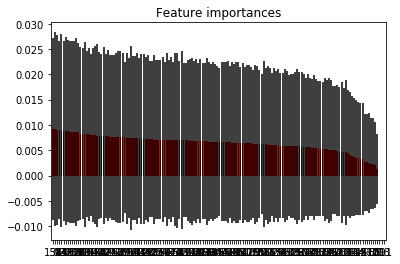

Index(['FOREX_EFFECTS', 'PH_INVEST', 'REINSUR_RECEIV', 'T_PROFIT',
       'REINS_INCOME', 'PUR_FIX_ASSETS_OTH', 'DIV_PROF_SUBS_MINO_S',
       'N_INCOME', 'C_PAID_TO_FOR_EMPL', 'INTAN_ASSETS', 'N_INCR_PLEDGE_LOAN',
       'OTH_OPER_COSTS', 'PUR_RESALE_FA', 'TAXES_PAYABLE', 'NOPERATE_EXP',
       'SPEC_OC', 'COMPR_INC_ATTR_M_S', 'N_CF_FR_INVEST_A',
       'C_PAID_FOR_OTH_OP_A', 'COMMIS_EXP'],
      dtype='object')

In [33]:
# feature extraction
#var importantce 
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1,X_train.shape[1]])
plt.show()
ans = []
for f in range(X_train.shape[1]):
    ans.append((f + 1, indices[f]))
X_train.columns[[x[1] for x in ans][:20]]

In [34]:
#select by variance threshold
from sklearn.feature_selection import VarianceThreshold
sel =VarianceThreshold(threshold=3)
sel.fit_transform(X_train)
X_train.loc[:, sel.get_support()].columns[:20]

Index(['CASH_C_EQUIV', 'LOAN_TO_OTH_BANK_FI', 'TRADING_FA', 'DERIV_ASSETS',
       'PUR_RESALE_FA', 'INT_RECEIV', 'PREMIUM_RECEIV', 'REINSUR_RECEIV',
       'RR_REINS_UNE_PREM', 'RR_REINS_OUTSTD_CLA', 'RR_REINS_LINS_LIAB',
       'RR_REINS_LTHINS_LIAB', 'PH_PLEDGE_LOANS', 'FIXED_TERM_DEPOS',
       'AVAIL_FOR_SALE_FA', 'HTM_INVEST', 'LT_EQUITY_INVEST',
       'REFUND_CAP_DEPOS', 'INVEST_REAL_ESTATE', 'FIXED_ASSETS'],
      dtype='object')

In [35]:
#select by 
selector = SelectKBest(f_classif, k=30)
X_new = selector.fit(X_train.values, y_train)
X_train.columns[selector.get_support()][:20]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Index(['DISP_FIX_ASSETS_OTH', 'N_DISP_SUBS_OTH_BIZ_C', 'C_FR_OTH_INVEST_A',
       'SPEC_ICIF', 'C_INF_FR_INVEST_A', 'PUR_FIX_ASSETS_OTH', 'C_PAID_INVEST',
       'N_INCR_PLEDGE_LOAN', 'N_C_PAID_ACQUIS', 'SPEC_ICOF',
       'C_OUTF_FR_INVEST_A', 'N_CF_FR_INVEST_A', 'C_FR_CAP_CONTR',
       'C_FR_MINO_S_SUBS', 'C_FR_BORR', 'C_FR_ISSUE_BOND', 'C_FR_OTH_FINAN_A',
       'SPEC_FCIF', 'C_INF_FR_FINAN_A', 'C_PAID_FOR_DEBTS'],
      dtype='object')

In [36]:
#select by discrete_mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
discrete_mutual_info_classif = partial(mutual_info_classif, discrete_features=True)
selector = SelectKBest(discrete_mutual_info_classif, k=30)
X_new = selector.fit(X_train.values, y_train)
X_train.columns[selector.get_support()][:20]

Index(['IFC_CASH_INCR', 'C_FR_OTH_OPERATE_A', 'SPEC_OCIF',
       'C_INF_FR_OPERATE_A', 'N_INC_DISBUR_OF_LA', 'ORIG_CONTR_C_INDEM',
       'C_PAID_IFC', 'C_PAID_POL_DIV', 'C_PAID_TO_FOR_EMPL',
       'C_PAID_FOR_TAXES', 'C_PAID_FOR_OTH_OP_A', 'SPEC_OCOF',
       'C_OUTF_OPERATE_A', 'N_CF_OPERATE_A', 'PROC_SELL_INVEST', 'GAIN_INVEST',
       'C_INF_FR_INVEST_A', 'PUR_FIX_ASSETS_OTH', 'C_PAID_INVEST',
       'N_INCR_PLEDGE_LOAN'],
      dtype='object')

In [41]:
from sklearn.linear_model import RandomizedLasso
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X_train, y_train)
names =X_train.columns 
print ("Features sorted by their score:")
ans = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)
[x[1] for x in ans][:20]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Features sorted by their score:


['FOREX_DIFFER',
 'RR_REINS_OUTSTD_CLA',
 'RESER_UNE_PREM',
 'LT_EQUITY_INVEST',
 'FIXED_TERM_DEPOS',
 'FOREX_GAIN',
 'NOPERATE_EXP',
 'POLICY_DIV_PAYABLE',
 'C_PAID_FOR_TAXES',
 'SOLD_FOR_REPUR_FA',
 'RESER_OUTSTD_CLAIMS',
 'SPEC_FCIF',
 'N_DISP_SUBS_OTH_BIZ_C',
 'N_INC_DISBUR_OF_LA',
 'CAPITAL_RESER',
 'RESER_LINS_LIAB',
 'SPEC_ICIF',
 'INT_RECEIV',
 'RR_REINS_LTHINS_LIAB',
 'N_CHANGE_IN_CASH']

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train, y_train)
 
print ("Features sorted by their rank:")
ans = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
[x[1] for x in ans][:20]

Features sorted by their rank:


['CAPITAL_RESER',
 'COMPENS_PAYOUT',
 'SPEC_ICIF',
 'C_PAID_DIV_PROF_INT',
 'PREM_FR_ORIG_CONTR',
 'N_INC_PH_DEPOS_INV',
 'C_FR_BORR',
 'PROC_SELL_INVEST',
 'C_PAID_INVEST',
 'N_CF_OPERATE_A',
 'C_FR_ISSUE_BOND',
 'SPEC_OCOF',
 'INDEP_ACC_ASSETS',
 'INDEPT_ACC_LIAB',
 'SPEC_FCIF',
 'HTM_INVEST',
 'AE',
 'T_LIAB_EQUITY',
 'SPEC_ICOF',
 'GAIN_INVEST']

In [49]:
import itertools

In [71]:
##thus feature sellection summary:
#rfe
f1 = ['CAPITAL_RESER',
 'COMPENS_PAYOUT',
 'SPEC_ICIF',
 'C_PAID_DIV_PROF_INT',
 'PREM_FR_ORIG_CONTR',
 'N_INC_PH_DEPOS_INV',
 'C_FR_BORR',
 'PROC_SELL_INVEST',
 'C_PAID_INVEST',
 'N_CF_OPERATE_A',
 'C_FR_ISSUE_BOND',
 'SPEC_OCOF',
 'INDEP_ACC_ASSETS',
 'INDEPT_ACC_LIAB',
 'SPEC_FCIF',
 'HTM_INVEST',
 'AE',
 'T_LIAB_EQUITY',
 'SPEC_ICOF',
 'GAIN_INVEST',
  'FOREX_DIFFER',
 'RR_REINS_OUTSTD_CLA',
 'RESER_UNE_PREM',
 'LT_EQUITY_INVEST',
 'FIXED_TERM_DEPOS',
 'FOREX_GAIN',
 'NOPERATE_EXP',
 'POLICY_DIV_PAYABLE',
 'C_PAID_FOR_TAXES',
 'SOLD_FOR_REPUR_FA',
 'RESER_OUTSTD_CLAIMS',
 'SPEC_FCIF',
 'N_DISP_SUBS_OTH_BIZ_C',
 'N_INC_DISBUR_OF_LA',
 'CAPITAL_RESER',
 'RESER_LINS_LIAB',
 'SPEC_ICIF',
 'INT_RECEIV',
 'RR_REINS_LTHINS_LIAB',
 'N_CHANGE_IN_CASH',
   'IFC_CASH_INCR', 'C_FR_OTH_OPERATE_A', 'SPEC_OCIF',
       'C_INF_FR_OPERATE_A', 'N_INC_DISBUR_OF_LA', 'ORIG_CONTR_C_INDEM',
       'C_PAID_IFC', 'C_PAID_POL_DIV', 'C_PAID_TO_FOR_EMPL',
       'C_PAID_FOR_TAXES', 'C_PAID_FOR_OTH_OP_A', 'SPEC_OCOF',
       'C_OUTF_OPERATE_A', 'N_CF_OPERATE_A', 'PROC_SELL_INVEST', 'GAIN_INVEST',
       'C_INF_FR_INVEST_A', 'PUR_FIX_ASSETS_OTH', 'C_PAID_INVEST',
       'N_INCR_PLEDGE_LOAN','DISP_FIX_ASSETS_OTH', 'N_DISP_SUBS_OTH_BIZ_C', 'C_FR_OTH_INVEST_A',
       'SPEC_ICIF', 'C_INF_FR_INVEST_A', 'PUR_FIX_ASSETS_OTH', 'C_PAID_INVEST',
       'N_INCR_PLEDGE_LOAN', 'N_C_PAID_ACQUIS', 'SPEC_ICOF',
       'C_OUTF_FR_INVEST_A', 'N_CF_FR_INVEST_A', 'C_FR_CAP_CONTR',
       'C_FR_MINO_S_SUBS', 'C_FR_BORR', 'C_FR_ISSUE_BOND', 'C_FR_OTH_FINAN_A',
       'SPEC_FCIF', 'C_INF_FR_FINAN_A', 'C_PAID_FOR_DEBTS','FOREX_EFFECTS', 'PH_INVEST', 'REINSUR_RECEIV', 'T_PROFIT',
       'REINS_INCOME', 'PUR_FIX_ASSETS_OTH', 'DIV_PROF_SUBS_MINO_S',
       'N_INCOME', 'C_PAID_TO_FOR_EMPL', 'INTAN_ASSETS', 'N_INCR_PLEDGE_LOAN',
       'OTH_OPER_COSTS', 'PUR_RESALE_FA', 'TAXES_PAYABLE', 'NOPERATE_EXP',
       'SPEC_OC', 'COMPR_INC_ATTR_M_S', 'N_CF_FR_INVEST_A',
       'C_PAID_FOR_OTH_OP_A', 'COMMIS_EXP']
      

In [73]:
l1 = sorted(collections.Counter(f1).items(), key = lambda x:x[-1],reverse=True)[:20]

In [79]:
l2= [x[0] for x in l1]

In [80]:
X_train[l2]

,SPEC_ICIF,C_PAID_INVEST,SPEC_FCIF,PUR_FIX_ASSETS_OTH,N_INCR_PLEDGE_LOAN,CAPITAL_RESER,C_FR_BORR,PROC_SELL_INVEST,N_CF_OPERATE_A,C_FR_ISSUE_BOND,SPEC_OCOF,SPEC_ICOF,GAIN_INVEST,NOPERATE_EXP,C_PAID_FOR_TAXES,N_DISP_SUBS_OTH_BIZ_C,N_INC_DISBUR_OF_LA,C_PAID_TO_FOR_EMPL,C_PAID_FOR_OTH_OP_A,C_INF_FR_INVEST_A
8,0.000000e+00,1.970810e+11,0.000000e+00,9.310000e+08,1.554000e+09,7.001400e+10,7.150000e+08,1.371810e+11,5.848700e+10,0.000000e+00,7.049000e+09,0.000000e+00,4.868000e+09,29000000.0,2.290000e+09,2.010000e+08,7.369000e+09,4.765000e+09,5.995000e+09,1.423430e+11
17,0.000000e+00,3.148570e+11,0.000000e+00,1.551000e+09,1.975000e+09,8.171700e+10,3.991000e+09,2.391980e+11,4.517400e+10,1.400000e+09,-2.761000e+10,0.000000e+00,1.949200e+10,322000000.0,6.357000e+09,0.000000e+00,3.006100e+10,7.006000e+09,2.111000e+10,2.587720e+11
9,0.000000e+00,1.980270e+11,0.000000e+00,4.470000e+08,1.839000e+09,8.125100e+10,1.102000e+09,1.671610e+11,2.235100e+10,1.994000e+09,7.110000e+09,0.000000e+00,5.886000e+09,92000000.0,4.379000e+09,6.360000e+08,5.296000e+09,3.553000e+09,7.900000e+09,1.738780e+11
34,0.000000e+00,1.320101e+12,-4.086000e+09,5.866000e+09,9.563000e+09,1.228360e+11,2.018820e+11,1.109280e+12,-1.988900e+10,5.290310e+11,8.572000e+09,-1.450000e+08,9.284800e+10,208000000.0,2.092900e+10,0.000000e+00,1.486010e+11,3.482700e+10,9.628200e+10,1.203687e+12
0,2.154000e+09,7.902600e+10,0.000000e+00,2.040000e+08,2.720000e+08,5.049400e+10,2.069000e+09,8.858000e+10,1.397500e+10,8.400000e+08,2.174000e+09,0.000000e+00,3.026000e+09,20000000.0,8.530000e+08,0.000000e+00,1.682500e+10,2.356000e+09,6.383000e+09,9.377700e+10
4,0.000000e+00,1.226110e+11,6.849000e+09,5.220000e+08,5.940000e+08,5.624100e+10,2.167000e+09,8.705200e+10,2.268400e+10,1.900000e+07,1.595400e+10,0.000000e+00,3.987000e+09,1000000.0,1.694000e+09,0.000000e+00,7.406000e+09,2.554000e+09,2.535000e+09,9.114600e+10
29,0.000000e+00,9.415060e+11,0.000000e+00,7.170000e+09,2.125000e+09,1.223840e+11,3.153400e+10,7.911540e+11,-5.327400e+10,2.682710e+11,1.355500e+10,1.608300e+10,3.628400e+10,68000000.0,1.951800e+10,-2.912000e+09,1.012120e+11,1.104800e+10,4.332200e+10,8.246460e+11
15,0.000000e+00,6.830570e+11,6.209400e+10,5.702000e+09,2.348000e+09,8.342400e+10,2.645000e+09,5.274840e+11,2.151900e+11,1.199800e+10,4.719700e+10,2.575000e+09,2.478400e+10,260000000.0,1.161100e+10,1.039000e+09,4.789000e+10,1.174200e+10,1.490200e+10,5.548130e+11
19,0.000000e+00,2.412840e+11,0.000000e+00,6.462000e+09,4.146000e+09,8.754400e+10,-7.965000e+09,1.159750e+11,6.422900e+10,2.960000e+10,-4.614000e+09,0.000000e+00,4.428000e+10,449000000.0,1.084400e+10,-1.090000e+08,5.369000e+10,1.441100e+10,3.230700e+10,1.606490e+11
5,0.000000e+00,1.644550e+11,-6.849000e+09,6.520000e+08,7.970000e+08,6.858600e+10,3.481000e+09,9.421700e+10,4.427700e+10,3.181000e+09,-7.644000e+09,1.614000e+09,4.242000e+09,58000000.0,3.577000e+09,0.000000e+00,6.312000e+09,3.447000e+09,8.534000e+09,9.860800e+10


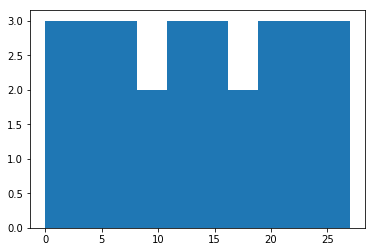

In [35]:
plt.hist(y_train)
plt.show()

### try regression

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
mu_hat=np.mean(y_train)
prediction_mse=mean_squared_error(y_test,mu_hat.repeat(y_test.shape))
print('Baseline model has a mean squared error of {0}'.format(prediction_mse))

Baseline model has a mean squared error of 6.7983366955710005e+22


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_scaler=MinMaxScaler()
X_scaler.fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)
y_scaler=StandardScaler()
y_scaler=y_scaler.fit(np.array(y_train).reshape([-1,1])) # scaling expects a matrix rather than a vector, so
# we are just reshaping the input here.
y_train_scaled=y_scaler.transform(np.array(y_train).reshape([-1,1])).reshape([-1]) 
y_test_scaled=y_scaler.transform(np.array(y_test).reshape([-1,1])).reshape([-1]) 

In [124]:
X_train_f = X_train[l2]
X_test_f = X_test[l2]

X_scaler=MinMaxScaler()
X_scaler.fit(X_train_f)
X_train_scaled_f=X_scaler.transform(X_train_f)
X_test_scaled_f=X_scaler.transform(X_test_f)
y_scaler=StandardScaler()
y_scaler=y_scaler.fit(np.array(y_train).reshape([-1,1])) # scaling expects a matrix rather than a vector, so
# we are just reshaping the input here.
y_train_scaled=y_scaler.transform(np.array(y_train).reshape([-1,1])).reshape([-1]) 
y_test_scaled=y_scaler.transform(np.array(y_test).reshape([-1,1])).reshape([-1]) 

In [95]:
mu_hat=np.mean(y_train_scaled)
print('We have scaled the data so the mean is {}, essentially 0.'.format(mu_hat))
training_mse=mean_squared_error(y_train_scaled,mu_hat.repeat(y_train_scaled.shape))
print('Baseline model has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,mu_hat.repeat(y_test.shape))
print('Baseline model has a mean squared error of {0} on the validation set'.format(prediction_mse))

We have scaled the data so the mean is 3.5190104798386656e-17, essentially 0.
Baseline model has a mean squared error of 1.0 on the training set
Baseline model has a mean squared error of 1.3119464478715166 on the validation set


In [96]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,lin_reg.predict(X_train_scaled))
print('Linear Regression has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,lin_reg.predict(X_test_scaled))
print('Linear Regression has a mean squared error of {0} on the validation set'.format(prediction_mse))

Linear Regression has a mean squared error of 8.850729710472759e-30 on the training set
Linear Regression has a mean squared error of 0.05789805908440979 on the validation set


In [125]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled_f,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,lin_reg.predict(X_train_scaled_f))
print('Linear Regression has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,lin_reg.predict(X_test_scaled_f))
print('Linear Regression has a mean squared error of {0} on the validation set'.format(prediction_mse))

Linear Regression has a mean squared error of 0.01163137964549897 on the training set
Linear Regression has a mean squared error of 0.39190531974810716 on the validation set


[ 2.02906451e-02  2.53613252e-02  7.49877855e-02  2.60833553e-02
  2.74698400e-03  5.30415442e-02  5.11386448e-02 -2.39058596e-02
 -6.99427836e-03 -4.16003508e-01 -2.83584729e-01 -3.07054494e-01
  8.32076170e-02  9.09699030e-02  6.50272739e-02  3.14092243e-02
  2.30133459e-01 -1.95171318e-02  6.32463462e-02  1.19281806e-02
 -1.05827507e-01 -1.20224173e-02  1.19970538e-01  1.69795075e-01
  1.88886356e-02  3.84134943e-02  1.50227072e-01 -2.39885058e-01
  9.90032752e-02  5.17551883e-02  1.12790634e-01 -2.81103599e-01
  6.93064979e-02 -4.51594151e-02  7.89894457e-02 -1.29561759e-01
  6.72481232e-02  1.27604763e-01  5.01190576e-02 -5.46070554e-02
  1.96262735e-01  1.98082409e-01  1.66071524e-01  1.54790250e-01
  8.67385415e-02 -1.20224173e-02  6.10898346e-02  1.00242732e-01
 -2.40371476e-02  3.42665926e-02 -1.27333270e-01  1.36758594e-01
  9.92607482e-04  1.09430405e-01  3.36128089e-03  1.07458925e-01
  2.31430898e-01  1.97595389e-01  1.07351196e-01 -6.59304273e-03
  8.21847344e-02  3.84134

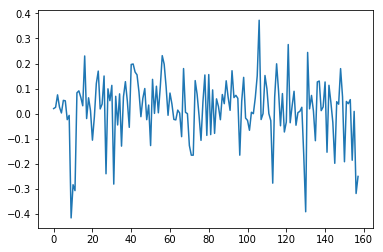

In [97]:
print(lin_reg.coef_)
plt.plot(lin_reg.coef_)

In [99]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [100]:
ridge_reg=Ridge(alpha=1.0)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
ridge_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,ridge_reg.predict(X_train_scaled))
print('Ridge Regression has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,ridge_reg.predict(X_test_scaled))
print('Ridge Regression has a mean squared error of {0} on the validation set'.format(prediction_mse))

Ridge Regression has a mean squared error of 0.015316422447213771 on the training set
Ridge Regression has a mean squared error of 0.15566303606231757 on the validation set


In [171]:
lasso_reg=Lasso(alpha=0.01)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
lasso_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,lasso_reg.predict(X_train_scaled))
print('Lasso has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,lasso_reg.predict(X_test_scaled))
print('Lasso has a mean squared error of {0} on the validation set'.format(prediction_mse))

Lasso has a mean squared error of 0.031326680813051316 on the training set
Lasso has a mean squared error of 0.9248532082307155 on the validation set


In [172]:
elastic_net_reg=ElasticNet(alpha=0.01,l1_ratio=0.75)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
# l1_ratio controls the relative ratio between the l1 penalty and the l2 penalty
elastic_net_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,elastic_net_reg.predict(X_train_scaled))
print('Elastic Net has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,elastic_net_reg.predict(X_test_scaled))
print('Elastic Net has a mean squared error of {0} on the validation set'.format(prediction_mse))

Elastic Net has a mean squared error of 0.0247104019246478 on the training set
Elastic Net has a mean squared error of 0.6337084834443121 on the validation set


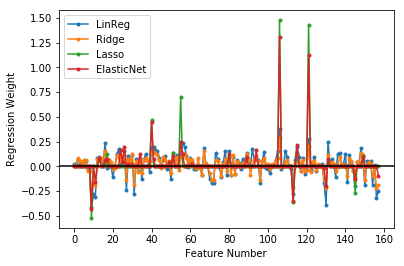

In [103]:
fig=plt.figure()
plt.plot(lin_reg.coef_,'.-',label='LinReg')
plt.plot(ridge_reg.coef_,'.-',label='Ridge')
plt.plot(lasso_reg.coef_,'.-',label='Lasso')
plt.plot(elastic_net_reg.coef_,'.-',label='ElasticNet')
plt.axhline(0, color='black')
plt.legend()
plt.xlabel('Feature Number')
plt.ylabel('Regression Weight')
plt.show()
  

In [104]:
from sklearn import linear_model

.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 30 iterations, i.e. alpha=1.893e-02, with an active set of 14 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 31 iterations, i.e. alpha=1.886e-02, with an active set of 15 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=1.643e-02, with an active set of 16 regressors, and the smallest cholesky

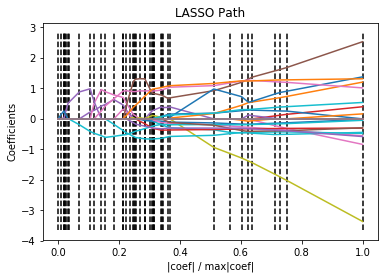

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_scaler=MinMaxScaler()
X_scaled=X_scaler.fit_transform(X_train)
y_scaler=StandardScaler()
y_scaled=y_scaler.fit_transform(np.array(y_train).reshape([-1,1])).reshape([-1])
alphas, _, coefs = linear_model.lars_path(X_scaled, y_scaled, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [177]:
X_train.columns[np.nonzero(lasso_reg.coef_)]

Index(['AE', 'RETAINED_EARNINGS', 'N_INCR_BORR_FR_CB', 'C_PAID_FOR_TAXES'], dtype='object')

In [107]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-2, 2, 40)
grid = GridSearchCV(estimator=Lasso(),
param_grid=dict(alpha=alphas), cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-02, 1.26638e-02, 1.60372e-02, 2.03092e-02, 2.57191e-02,
       3.25702e-02, 4.12463e-02, 5.22335e-02, 6.61474e-02, 8.37678e-02,
       1.06082e-01, 1.34340e-01, 1.70125e-01, 2.15443e-01, 2.72833e-01,
       3.45511e-01, 4.37548e-01, 5.54102e-01, 7.01704e-01, 8.88... 2.42446e+01, 3.07029e+01,
       3.88816e+01, 4.92388e+01, 6.23551e+01, 7.89652e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [174]:
grid.best_params_

{'alpha': 0.004923882631706731}

In [175]:
lasso_reg=Lasso(alpha=0.01)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
lasso_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,lasso_reg.predict(X_train_scaled))
print('Lasso has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,lasso_reg.predict(X_test_scaled))
print('Lasso has a mean squared error of {0} on the validation set'.format(prediction_mse))

Lasso has a mean squared error of 0.031326680813051316 on the training set
Lasso has a mean squared error of 0.9248532082307155 on the validation set


In [176]:
lasso_reg=Lasso(alpha=0.049)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
lasso_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,lasso_reg.predict(X_train_scaled))
print('Lasso has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,lasso_reg.predict(X_test_scaled))
print('Lasso has a mean squared error of {0} on the validation set'.format(prediction_mse))

Lasso has a mean squared error of 0.15478814567005414 on the training set
Lasso has a mean squared error of 0.6296991286132183 on the validation set


In [111]:
alphas = np.logspace(-10, 10, 40)
grid =lasso_reg=Lasso(alpha=0.0412)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
lasso_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,lasso_reg.predict(X_train_scaled))
print('Lasso has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,lasso_reg.predict(X_test_scaled))
print('Lasso has a mean squared error of {0} on the validation set'.format(prediction_mse)) GridSearchCV(estimator=Ridge(),
param_grid=dict(alpha=alphas), cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-10, 3.25702e-10, 1.06082e-09, 3.45511e-09, 1.12534e-08,
       3.66524e-08, 1.19378e-07, 3.88816e-07, 1.26638e-06, 4.12463e-06,
       1.34340e-05, 4.37548e-05, 1.42510e-04, 4.64159e-04, 1.51178e-03,
       4.92388e-03, 1.60372e-02, 5.22335e-02, 1.70125e-01, 5.54... 8.37678e+06, 2.72833e+07,
       8.88624e+07, 2.89427e+08, 9.42668e+08, 3.07029e+09, 1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [112]:
grid.best_params_

{'alpha': 0.004923882631706731}

In [113]:
ridge_reg=Ridge(alpha=0.004)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
ridge_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,ridge_reg.predict(X_train_scaled))
print('Ridge Regression has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,ridge_reg.predict(X_test_scaled))
print('Ridge Regression has a mean squared error of {0} on the validation set'.format(prediction_mse))

Ridge Regression has a mean squared error of 1.2669723839511862e-06 on the training set
Ridge Regression has a mean squared error of 0.057937649942102154 on the validation set


In [114]:
ridge_reg=Ridge(alpha=1)
# Alpha controls how strong the regularization is.  Higher values equals more regularization.
ridge_reg.fit(X_train_scaled,y_train_scaled)
training_mse=mean_squared_error(y_train_scaled,ridge_reg.predict(X_train_scaled))
print('Ridge Regression has a mean squared error of {0} on the training set'.format(training_mse))
prediction_mse=mean_squared_error(y_test_scaled,ridge_reg.predict(X_test_scaled))
print('Ridge Regression has a mean squared error of {0} on the validation set'.format(prediction_mse))

Ridge Regression has a mean squared error of 0.015316422447213771 on the training set
Ridge Regression has a mean squared error of 0.15566303606231757 on the validation set


In [142]:
X_train.shape

(28, 159)

In [136]:
test = X_test
test['y'] = y_test

In [148]:
pd.DataFrame(X_train).to_csv('x_train.csv',index=False)
pd.DataFrame(y_train).to_csv('y_train.csv',index=False)
pd.DataFrame(X_test).to_csv('x_test.csv',index=False)
pd.DataFrame(y_test).to_csv('y_test.csv',index=False)

In [134]:
git clone --recursive https://github.com/dmlc/xgboost

SyntaxError: invalid syntax (<ipython-input-134-6dcede5fe7e9>, line 1)

In [162]:
def visualize_tree(tree,columns):
    export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                    feature_names=columns, impurity=False, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_e = le.fit_transform(y_train_scaled)

In [158]:
!pip install graphviz

In [159]:
import graphviz
from sklearn.tree import export_graphviz

In [181]:
y_e.shape

(28,)

In [182]:
tree1 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=1,max_features=None)
tree1=tree1.fit(X_train_scaled, y_e)


In [169]:
X_train_scaled.shape

(28, 158)